# similarity-learning

> A fastai based framework for similarity learning

## Docs

See https://irad-zehavi.github.io/similarity-learning/

## Install

```sh
pip install similarity_learning
```

## How to use

As an nbdev library, `similarity_learning` supports `import *` (without importing unwanted symbols):

In [ ]:
from similarity_learning.all import *

Now we can train a pair-matcher. First let's construct dataloaders of pairs:

In [ ]:
from fastai.vision.all import *

In [ ]:
pairs = Pairs(Imagenette(160), .1)
dls = pairs.dls(after_item=Resize(128),
                after_batch=Normalize.from_stats(*imagenet_stats))

To get quick results, we can use the body of a pretrained model as a backbone for our Siamese neural network:

In [ ]:
classifier = resnet34(weights=ResNet34_Weights.DEFAULT)
siamese = ThresholdSiamese(create_body(model=classifier, cut=-1)).to(dls.device)
siamese.fit_threshold(dls.train)

(1.0099999904632568, 0.8962054252624512)

Let's see how good it is:

In [ ]:
learn = Learner(dls, siamese, metrics=accuracy)
learn.validate()

(#2) [0.5453092455863953,0.8877550959587097]

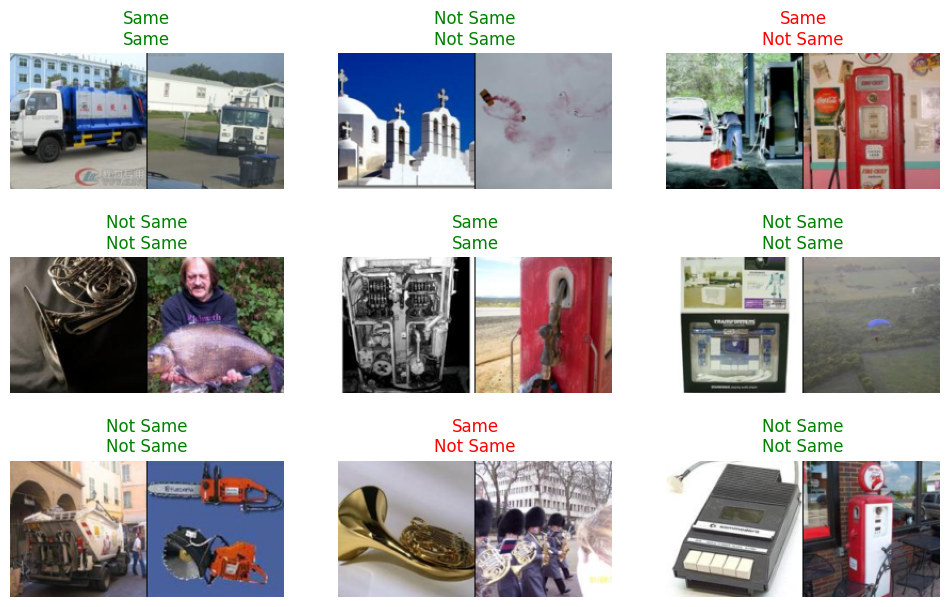

In [ ]:
learn.show_results()

Not bad, but we can do better with finetuning:

In [ ]:
learn.fit(5, 1e-4)
learn.validate()

(#2) [0.26150667667388916,0.954081654548645]

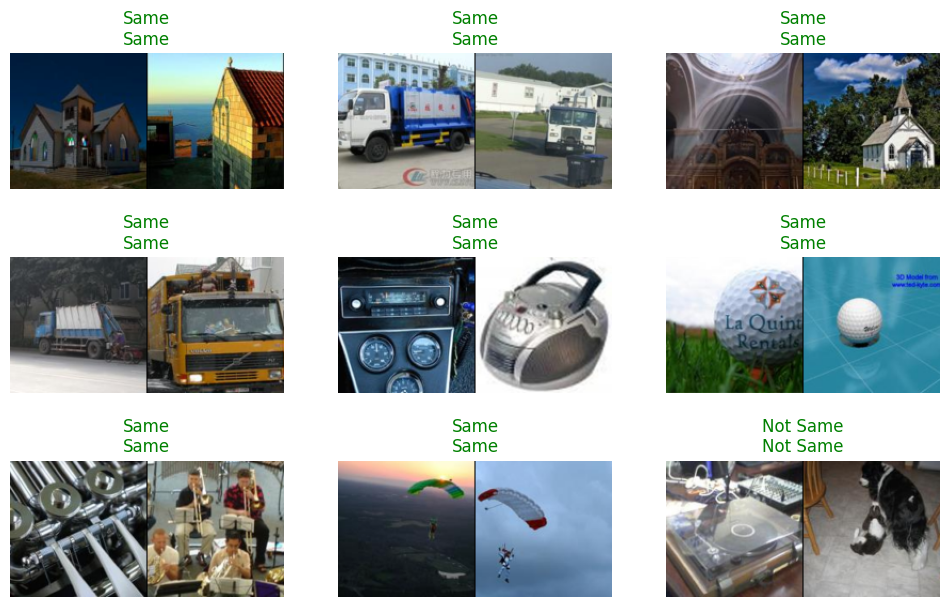

In [ ]:
learn.show_results()

We can also consider the distribution of feature-space distances compared to the decision threshold:

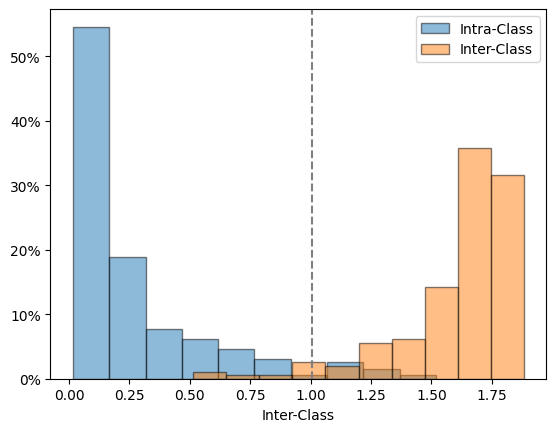

In [ ]:
siamese.plot_distance_histogram(dls.valid)

See the rest of the docs for more examples, including more visualizations, comparison of loss functions, and facial recognition.